In [1]:
# Function imports
import gen_mandelbrot as gm
import sampling_alg as sa
import area as a

# Library imports
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle

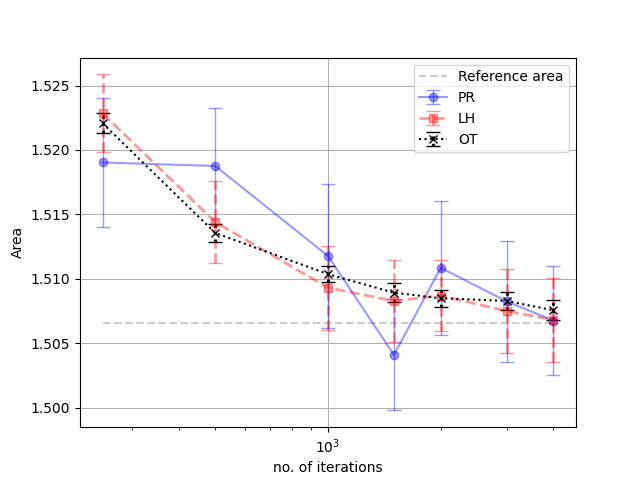

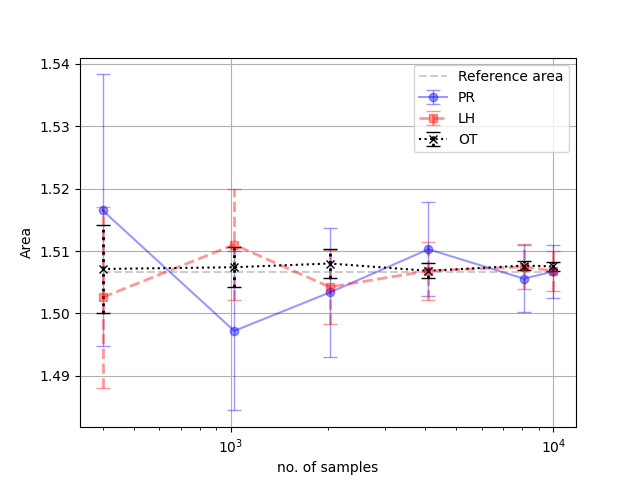

In [2]:
# samples = np.array([[j * 10 ** i for j in [1,4]] for i in range(2,6,2)]).flatten()   # sample size
# iterations = np.array([[j * 10 ** i for j in [1,4]] for i in range(2,5)]).flatten()  # iterations

samples = [ i ** 2 for i in [10, 20, 32, 45, 64, 90, 100]]
iterations = [100, 250, 500, 1000, 1500, 2000, 3000, 4000]

bounds = -2, 0.47, -1.12, 1.12              # real-min,max,im-min,max

# A_pr, A_lh, A_ot = a.mc_area(bounds, samples, iterations, 10)
A_pr, A_lh, A_ot = a.pickleopen('pickle/', '_100it')

plt.close()
%matplotlib widget
# a.plotarea3D(A_pr, samples, iterations)
# a.plotarea3D(A_lh, samples, iterations)
# a.plotarea3D(A_ot, samples, iterations)

# Convert STD to CI
A_pr[:,:,1] = a.confidint(A_pr[:,:,1], 100, 1.96)
A_lh[:,:,1] = a.confidint(A_lh[:,:,1], 100, 1.96)
A_ot[:,:,1] = a.confidint(A_ot[:,:,1], 100, 1.96)

pr_it, lh_it, ot_it = A_pr[:,-1,:], A_lh[:,-1,:], A_ot[:,-1,:]
pr_sm, lh_sm, ot_sm = A_pr[-1,:,:], A_lh[-1,:,:], A_ot[-1,:,:]
## Shape of A:  A[iterations, samples, (area, std)]
a.plotconv(pr_it[1:], lh_it[1:], ot_it[1:], iterations[1:], 'iterations')
a.plotconv(pr_sm[1:], lh_sm[1:], ot_sm[1:], samples[1:], 'samples')

In [3]:
samples = np.array([[j * 10 ** i for j in [1, 4]] for i in range(2, 6, 2)]).flatten()
samples_2 = [(i, i ** 2) for i in np.arange(7, 200)]  # sample size

In [4]:
iterations

[100, 250, 500, 1000, 1500, 2000, 3000, 4000]

In [5]:
normal_ot = [1,2]
anti_ot = [2,1]
np.mean(np.array([normal_ot, anti_ot]), axis=1)

array([1.5, 1.5])

In [6]:
A_pr[:,-1,:][1:]

array([[1.51902471, 0.00498916],
       [1.5187536 , 0.00451984],
       [1.51176567, 0.00556139],
       [1.50408615, 0.00430982],
       [1.51084723, 0.00521059],
       [1.50824128, 0.00471678],
       [1.50674742, 0.00422272]])